In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [125]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [126]:
y= data['species']
x= data.drop('species', axis =1)

# Custom implementation

In [127]:
X_mean = x-np.mean(x, axis=0)
X_mean

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [128]:
cov_matrix = np.cov(X_mean.T)
cov_matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [129]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
eigen_values

array([0.02368303, 0.07852391, 0.24224357, 4.22484077])

In [130]:
eigen_vectors = eigen_vectors.T
eigen_vectors

array([[ 0.31725455, -0.32409435, -0.47971899,  0.75112056],
       [ 0.58099728, -0.59641809, -0.07252408, -0.54906091],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.36158968,  0.08226889, -0.85657211, -0.35884393]])

In [131]:
idx = np.argsort(eigen_values)[::-1]
idx

array([3, 2, 1, 0])

In [132]:
eigenvalues= eigen_values[idx]
eigenvalues

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [133]:
eigen_vectors = eigen_vectors[idx]
eigen_vectors

array([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [ 0.58099728, -0.59641809, -0.07252408, -0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [134]:
explained_variance_custom = eigenvalues/np.sum(eigenvalues)
explained_variance_custom

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [135]:
np.cumsum(explained_variance_custom)

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

selecting 0.97 as our variance cut off. So, 2 Principal Components are selected.

In [136]:
principal_comp = eigen_vectors[:2]
principal_comp

array([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [170]:
X_new_custom = np.dot(X_mean, principal_comp.T)
#X_new_custom

# library implementation

In [143]:
pca = PCA()
X_new = pca.fit_transform(x)

In [144]:
pca.get_covariance()

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [145]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

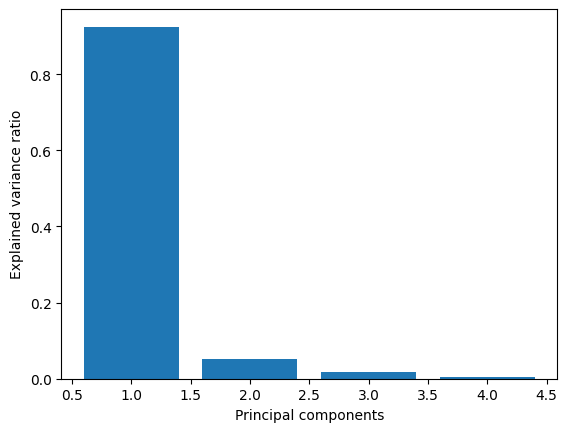

In [146]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)#, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [147]:
X_new.shape

(150, 4)

In [148]:
pca_2 = PCA(n_components=2)
X_new_2 = pca_2.fit_transform(x)

In [149]:
explained_variance_2 = pca_2.explained_variance_ratio_
print(" Percentage sum of explained variance: {}%".format(np.round(np.sum(explained_variance_2)*100)))
#explained_variance_2

 Percentage sum of explained variance: 98.0%


In [171]:
print(X_new_2[:3])
print(X_new_custom[:3])

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]]
[[ 2.68420713  0.32660731]
 [ 2.71539062 -0.16955685]
 [ 2.88981954 -0.13734561]]


## Visualising both projection

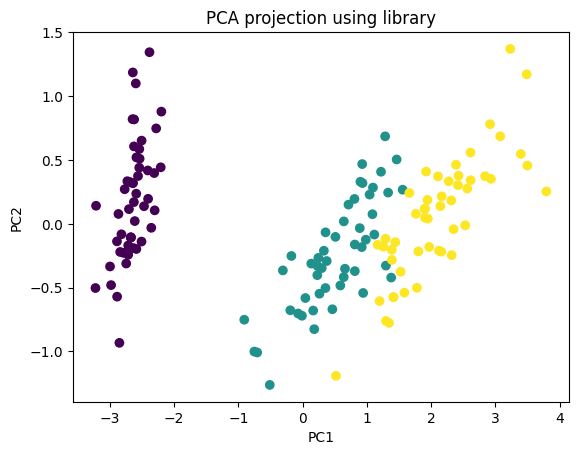

In [176]:
plt.scatter (X_new_2[:,0], X_new_2[:,1], c=y.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection using library')
plt.show()

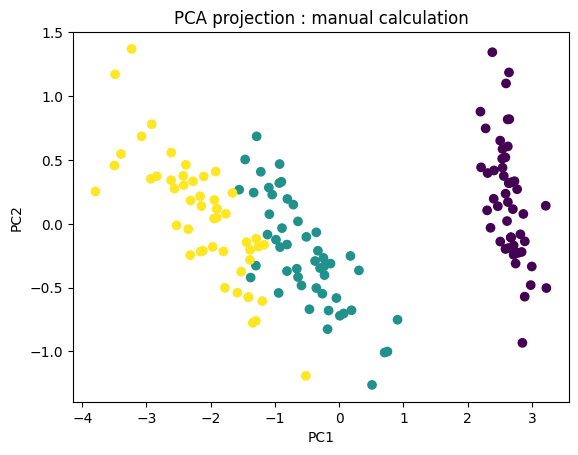

In [177]:
plt.scatter (X_new_custom[:,0], X_new_custom[:,1], c=y.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection : manual calculation')
plt.show()

# Custom PCA on smaple data

In [151]:
x1 = np.array([1,2,3,4,5])
x2 = np.array([1,2,3,4,5])


In [152]:
x_combined = np.stack((x1,x2), axis=1)
x_combined

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

In [153]:
pca = PCA()
X_new = pca.fit_transform(x_combined)

In [154]:
pca.get_covariance()

array([[2.5, 2.5],
       [2.5, 2.5]])

In [155]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.00000000e+00, 7.39557099e-33])

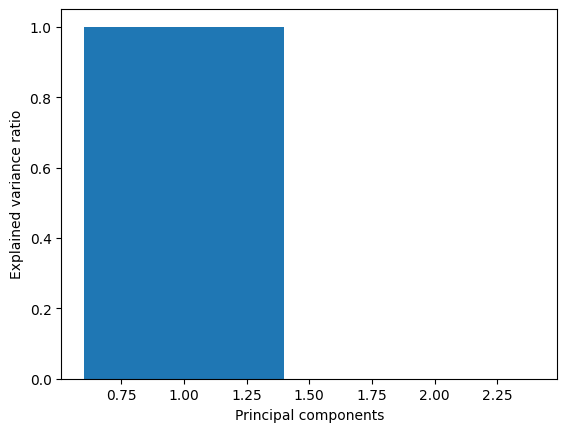

In [156]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [157]:
pca_1 = PCA(n_components=1)
X_comnbined_new_1 = pca_1.fit_transform(x_combined)

In [158]:
exp_var = pca_1.explained_variance_ratio_
print(" Percentage sum of explained variance: {}%".format(np.round(np.sum(exp_var)*100)))

 Percentage sum of explained variance: 100.0%


In [159]:
x_combined_mean = x_combined - np.mean(x_combined, axis=0)
x_combined_mean

array([[-2., -2.],
       [-1., -1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.]])

In [160]:
x_combined_mean_cov = np.cov(x_combined_mean) # this is in the wrong format. because, here, the covariance is found using
x_combined_mean_cov

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [161]:
x_combined_mean_cov = np.cov(x_combined_mean.T)
x_combined_mean_cov

array([[2.5, 2.5],
       [2.5, 2.5]])

In [162]:
eigen_values, eigen_vectors = np.linalg.eig(x_combined_mean_cov)
eigen_values

array([5.0000000e+00, 4.4408921e-16])

In [163]:
eigen_values, eigen_vectors = np.linalg.eigh(x_combined_mean_cov)

In [164]:
eigen_values
# values show that the second component is having significance.

array([0., 5.])

In [165]:
eigen_vectors

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [166]:
np.linalg.norm(eigen_vectors[:,1])

0.9999999999999999

In [167]:
eigen_vectors[:,1].shape

(2,)

In [168]:
x_combined_mean.shape

(5, 2)

In [169]:
X_new_simple = np.dot(x_combined_mean, eigen_vectors[:,1].T) #  transpose because, row, column has to match
X_new_simple

array([-2.82842712, -1.41421356,  0.        ,  1.41421356,  2.82842712])